## SimulatorPWC

In [1]:
import numpy as np

from qubex.simulator import (
    Control,
    ControlPWC,
    Coupling,
    Simulator,
    SimulatorPWC,
    System,
    Transmon,
)

In [2]:
transmons = [
    Transmon(
        label="Q08",
        dimension=3,
        frequency=7.646,
        anharmonicity=-0.356,
    ),
    Transmon(
        label="Q09",
        dimension=3,
        frequency=8.442,
        anharmonicity=-0.448,
    ),
    Transmon(
        label="Q10",
        dimension=3,
        frequency=8.316,
        anharmonicity=-0.412,
    ),
    Transmon(
        label="Q11",
        dimension=3,
        frequency=7.192,
        anharmonicity=-0.368,
    ),
]

couplings = [
    Coupling(pair=("Q08", "Q09"), strength=0.01),
    Coupling(pair=("Q10", "Q11"), strength=0.01),
    Coupling(pair=("Q08", "Q10"), strength=0.01),
    Coupling(pair=("Q09", "Q11"), strength=0.01),
]

system = System(
    transmons=transmons,
    couplings=couplings,
)

In [3]:
system.hamiltonian

Quantum object: dims = [[3, 3, 3, 3], [3, 3, 3, 3]], shape = (81, 81), type = oper, isherm = True
Qobj data =
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.          45.18866873   0.         ...   0.           0.
    0.        ]
 [  0.           0.          88.06512527 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 299.02935514   0.
    0.        ]
 [  0.           0.           0.         ...   0.         344.21802387
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  387.0944804 ]]

In [4]:
simulator = SimulatorPWC(system)

In [5]:
initial_state = system.state(
    {
        "Q08": "0",  # |0>
        "Q09": "-i",  # |-i>
        "Q10": "+",  # |+>
        "Q11": "*",  # random state in qubit subspace
    },
)

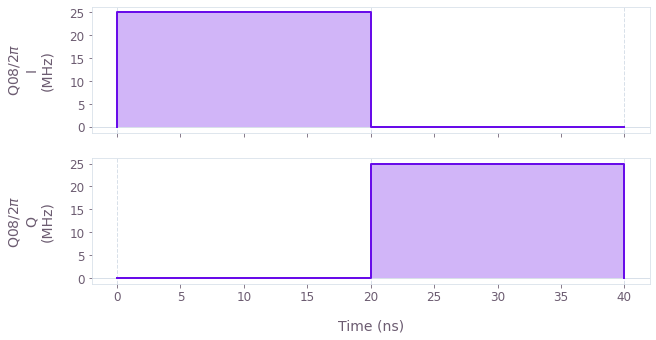

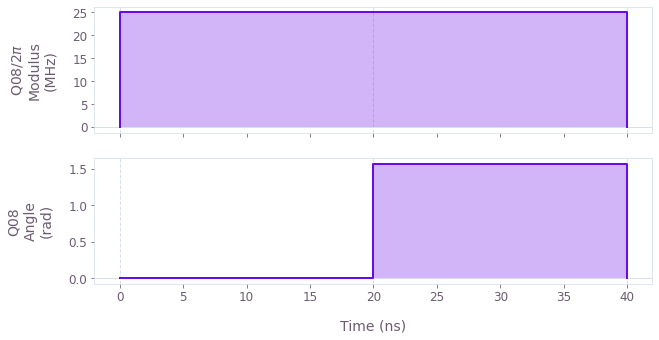

In [6]:
target = transmons[0]

detuning = 0.001

control = ControlPWC(
    target=target.label,
    frequency=target.frequency + detuning,
    segment_values=[np.pi * 0.05, np.pi * 0.05j],
    segment_width=20.0,
    nsteps_per_segment=20,
)
control.plot()
control.plot(polar=True)

In [7]:
result = simulator.simulate(
    control=control,
    initial_state=initial_state,
)

In [8]:
final_state = result.states[-1]
final_state

Quantum object: dims = [[3, 3, 3, 3], [3, 3, 3, 3]], shape = (81, 81), type = oper, isherm = True
Qobj data =
[[ 1.57949977e-01+0.00000000e+00j -1.10174541e-01+4.77924864e-02j
   4.66296957e-04+2.31803193e-03j ... -7.92266373e-06+5.45555143e-07j
  -6.87895989e-07+3.27610376e-08j -1.09069811e-09-1.06487908e-09j]
 [-1.10174541e-01-4.77924864e-02j  9.13108788e-02+0.00000000e+00j
   3.76134632e-04-1.75798439e-03j ...  5.69135427e-06+2.01669869e-06j
   4.89739585e-07+1.85291749e-07j  4.38581543e-10+1.07280635e-09j]
 [ 4.66296957e-04-2.31803193e-03j  3.76134632e-04+1.75798439e-03j
   3.53954144e-05+0.00000000e+00j ... -1.53827167e-08+1.17881487e-07j
  -1.55000134e-09+1.01920954e-08j -1.88478211e-11+1.28630799e-11j]
 ...
 [-7.92266373e-06-5.45555143e-07j  5.69135427e-06-2.01669869e-06j
  -1.53827167e-08-1.17881487e-07j ...  3.99279773e-10+0.00000000e+00j
   3.46175521e-11+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-6.87895989e-07-3.27610376e-08j  4.89739585e-07-1.85291749e-07j
  -1.55

In [9]:
final_state_target = result.substates("Q08")[-1]
final_state_target

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.99262781+0.j         -0.03290314+0.03407223j -0.06406147-0.00397156j]
 [-0.03290314-0.03407223j  0.00321369+0.j          0.00202294+0.00227471j]
 [-0.06406147+0.00397156j  0.00202294-0.00227471j  0.0041585 +0.j        ]]

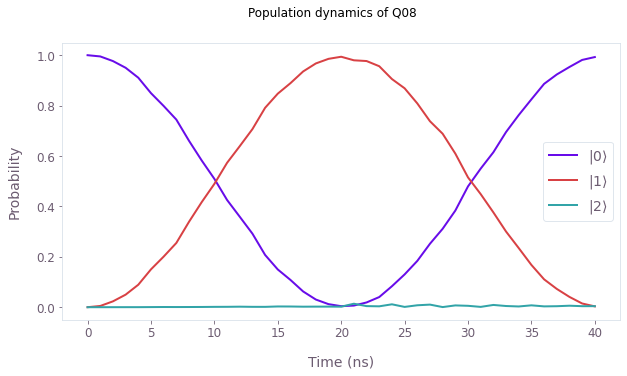

In [10]:
result.plot_population_dynamics("Q08")

In [11]:
result.show_last_population("Q08")

|0⟩: 0.993
|1⟩: 0.003
|2⟩: 0.004


In [12]:
result.display_bloch_sphere("Q08", frame="drive")
result.display_bloch_sphere("Q08", frame="qubit")

Q08 in the drive frame


<IPython.core.display.Javascript object>

Q08 in the qubit frame


<IPython.core.display.Javascript object>

In [13]:
result.display_bloch_sphere("Q09", frame="qubit")
result.display_bloch_sphere("Q10", frame="qubit")
result.display_bloch_sphere("Q11", frame="qubit")

Q09 in the qubit frame


<IPython.core.display.Javascript object>

Q10 in the qubit frame


<IPython.core.display.Javascript object>

Q11 in the qubit frame


<IPython.core.display.Javascript object>

## Simulator

In [14]:
simulator = Simulator(system)

In [15]:
initial_state = system.state(
    {
        "Q08": "0",  # |0>
        "Q09": "-i",  # |-i>
        "Q10": "+",  # |+>
        "Q11": "*",  # random state in qubit subspace
    },
)

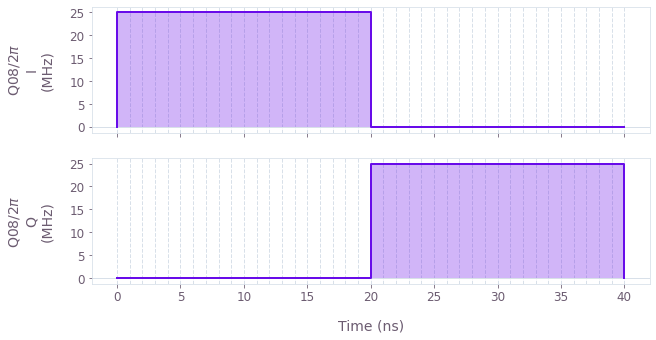

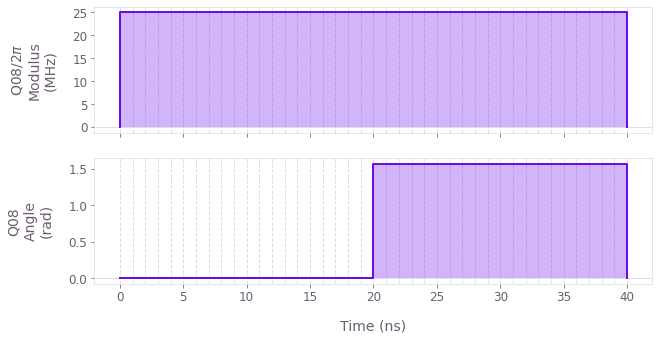

In [16]:
target = transmons[0]

detuning = 0.001

control = Control(
    target=target.label,
    frequency=target.frequency + detuning,
    waveform=[np.pi * 0.05] * 20 + [np.pi * 0.05j] * 20,
    sampling_period=1,
)
control.plot()
control.plot(polar=True)

In [17]:
result = simulator.simulate(
    control=control,
    initial_state=initial_state,
)

In [18]:
final_state = result.states[-1]
final_state

Quantum object: dims = [[3, 3, 3, 3], [3, 3, 3, 3]], shape = (81, 81), type = oper, isherm = True
Qobj data =
[[ 1.94779631e-01-5.27715906e-19j -9.45031108e-02-4.07655441e-02j
  -1.16466523e-03+1.65476668e-03j ... -4.24364615e-06-4.93428246e-06j
  -4.11911313e-07-4.15531144e-07j  4.10797012e-11-1.32994879e-09j]
 [-9.45031108e-02+4.07655441e-02j  5.43834028e-02-1.91493533e-18j
   2.18865617e-04-1.04714338e-03j ...  3.06913065e-06+1.51956822e-06j
   2.86166341e-07+1.15904344e-07j  2.57866402e-10+6.53393501e-10j]
 [-1.16466523e-03-1.65476668e-03j  2.18865617e-04+1.04714338e-03j
   2.10365295e-05-5.04816118e-20j ... -2.47613679e-08+6.85873760e-08j
  -1.14884588e-09+5.84941017e-09j -1.14112496e-11+7.46834276e-12j]
 ...
 [-4.24364615e-06+4.93428246e-06j  3.06913065e-06-1.51956822e-06j
  -2.47613679e-08-6.85873760e-08j ...  2.17953709e-10-2.03169538e-25j
   1.95300976e-11-1.35822253e-12j  3.27791861e-14+3.01059797e-14j]
 [-4.11911313e-07+4.15531144e-07j  2.86166341e-07-1.15904344e-07j
  -1.14

In [19]:
final_state_target = result.substates("Q08")[-1]
final_state_target

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.99251475+0.j         -0.03229222+0.03429903j -0.06514074-0.00402692j]
 [-0.03229222-0.03429903j  0.00318502+0.j          0.00201911+0.00232588j]
 [-0.06514074+0.00402692j  0.00201911-0.00232588j  0.00430023+0.j        ]]

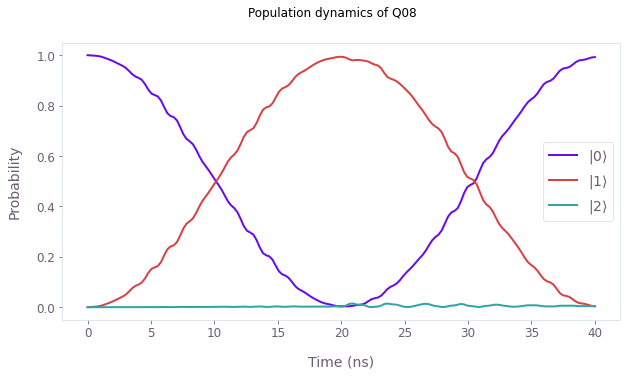

In [20]:
result.plot_population_dynamics("Q08")

In [21]:
result.show_last_population("Q08")

|0⟩: 0.993
|1⟩: 0.003
|2⟩: 0.004


In [22]:
result.display_bloch_sphere("Q08", frame="drive")
result.display_bloch_sphere("Q08", frame="qubit")

Q08 in the drive frame


<IPython.core.display.Javascript object>

Q08 in the qubit frame


<IPython.core.display.Javascript object>

In [23]:
result.display_bloch_sphere("Q09", frame="qubit")
result.display_bloch_sphere("Q10", frame="qubit")
result.display_bloch_sphere("Q11", frame="qubit")

Q09 in the qubit frame


<IPython.core.display.Javascript object>

Q10 in the qubit frame


<IPython.core.display.Javascript object>

Q11 in the qubit frame


<IPython.core.display.Javascript object>